<a href="https://colab.research.google.com/github/tatamiya/blog_artifacts/blob/main/zenn/20230918_multicolinearity/%E5%AE%8C%E5%85%A8%E3%81%A7%E3%81%AA%E3%81%84%E5%A4%9A%E9%87%8D%E5%85%B1%E7%B7%9A%E6%80%A7%E3%81%8C%E3%81%82%E3%82%8B%E3%81%A8%E3%81%8D%E3%81%AE%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0%E4%BF%82%E6%95%B0%E3%81%AE%E5%88%86%E5%B8%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [2]:
sample_size = 10

sigma1 = 4
x1 = sigma1 * np.random.randn(sample_size) + 1

coef = 2.0

In [3]:
# 相関係数が与えられた値になるように x2 を作成する。
rho = 0.50

sigma_eta = np.abs(coef) * sigma1 * np.sqrt(1/rho**2 - 1)
eta = sigma_eta * np.random.randn(sample_size)

x2 = x1 * coef + eta

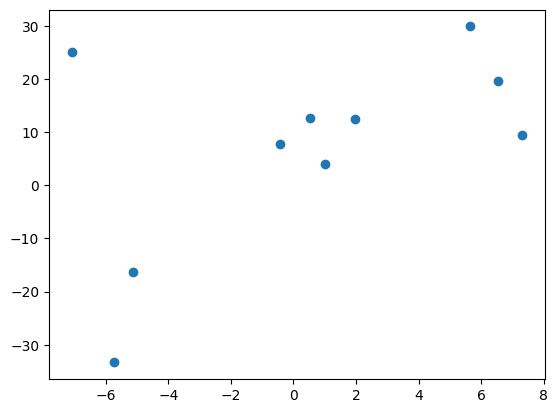

In [4]:
plt.scatter(x1, x2)

In [5]:
# design matrix
x_mat = np.r_[[np.ones(sample_size), x1, x2]].T
x_mat

array([[  1.        ,   0.53561478,  12.68097619],
       [  1.        ,   0.99575977,   3.94550681],
       [  1.        ,  -5.11834825, -16.41105822],
       [  1.        ,  -5.71915399, -33.34062871],
       [  1.        ,  -0.44249001,   7.71179291],
       [  1.        ,   5.63937731,  29.85896257],
       [  1.        ,   6.55609433,  19.58214765],
       [  1.        ,  -7.09319696,  25.05841185],
       [  1.        ,   7.32229073,   9.47562772],
       [  1.        ,   1.97556834,  12.48025592]])

In [6]:
# true coefficients
beta = np.array([1, 1, 1])

# std of error term
sigma = 1.5

In [7]:
# 誤差項を変えて複数回試行し、推定量の分布を求める。
n_iter = 1000
list_beta_hat = []

x_pinv = np.linalg.pinv(x_mat) # Moore-Penrose inverse
for i in range(0, n_iter):
  eps_vec = np.random.randn(sample_size) * sigma
  y = np.dot(x_mat, beta) + eps_vec
  beta_hat = np.dot(x_pinv, y)
  list_beta_hat.append(beta_hat)

beta_hat_samples = np.array(list_beta_hat)

In [8]:
# 推定量のサンプル平均が真の値に近い値を持っていることを確認
beta_hat_samples.mean(0)

array([0.97640872, 0.99703749, 1.00141741])

In [9]:
# 直線作図用
def plot_line(func, x_min, x_max, ax, **args):
  _x = x_min + (x_max - x_min) * np.arange(0, 1, 1/20)
  _y = func(_x)

  return ax.plot(_x, _y, **args)

In [10]:
# 推定量の分散共分散行列
cov = sigma ** 2 * (x_pinv @ x_pinv.T)[1:, 1:]

# 推定量の理論分布（灰色の楕円）を描くために、固有値・固有ベクトルを求めておく
cov_eig_val, cov_eig_vec = np.linalg.eig(cov)
cov_eig_val, cov_eig_vec

(array([0.0131019 , 0.00067574]),
 array([[ 0.98899826,  0.14792713],
        [-0.14792713,  0.98899826]]))

Text(0, 0.5, '$\\hat{\\beta}_2$')

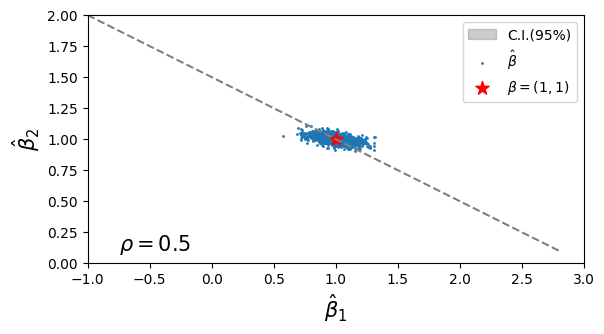

In [11]:
# 作図
x_min = -1.0
x_max = 3.0

beta_hat_samples = np.array(list_beta_hat)
beta1_hat = beta_hat_samples[:, 1]
beta2_hat = beta_hat_samples[:, 2]

fig, ax = plt.subplots()
ax.set_box_aspect(0.5)

z_alpha = norm.ppf(0.975)
ellipse_width = np.sqrt(cov_eig_val[0]) * z_alpha * 2
ellipse_height = np.sqrt(cov_eig_val[1]) * z_alpha * 2
ellipse_angle = np.arctan2(cov_eig_vec[1,0], cov_eig_vec[0,0]) / np.pi * 180

ellipse = Ellipse((1,1), width=ellipse_width, height=ellipse_height, angle=ellipse_angle, color="gray", alpha=0.4, label="C.I.(95%)")
ax.add_patch(ellipse)

plot_line(lambda x: -0.5*x + 1.5, x_min, x_max, ax, ls="--", color="gray")

ax.scatter(x=beta1_hat, y=beta2_hat, s=1, label="$\\hat{\\beta}$")

ax.scatter(beta[1], beta[2], color="red", s=100, marker="*", label="$\\beta=(1,1)$")

ax.text(-0.75,0.1, "$\\rho={}$".format(rho), fontsize=15)

ax.legend()

ax.set_xlim(x_min, x_max)
ax.set_ylim(0,(x_max - x_min) * 0.5)

ax.set_xlabel("$\\hat{\\beta}_1$", fontsize="15")
ax.set_ylabel("$\\hat{\\beta}_2$", fontsize="15")

# 相関係数 $\rho$ の異なるグラフを並べて表示

In [12]:
sample_size = 10

# x1 の生成に使う
sigma1 = 4

# x2 の生成に使う
coef = 2.0

# true coefficients
beta = np.array([1, 1, 1])

# std of error term
sigma = 1.5

# 実験の iteration 回数
n_iter = 1000

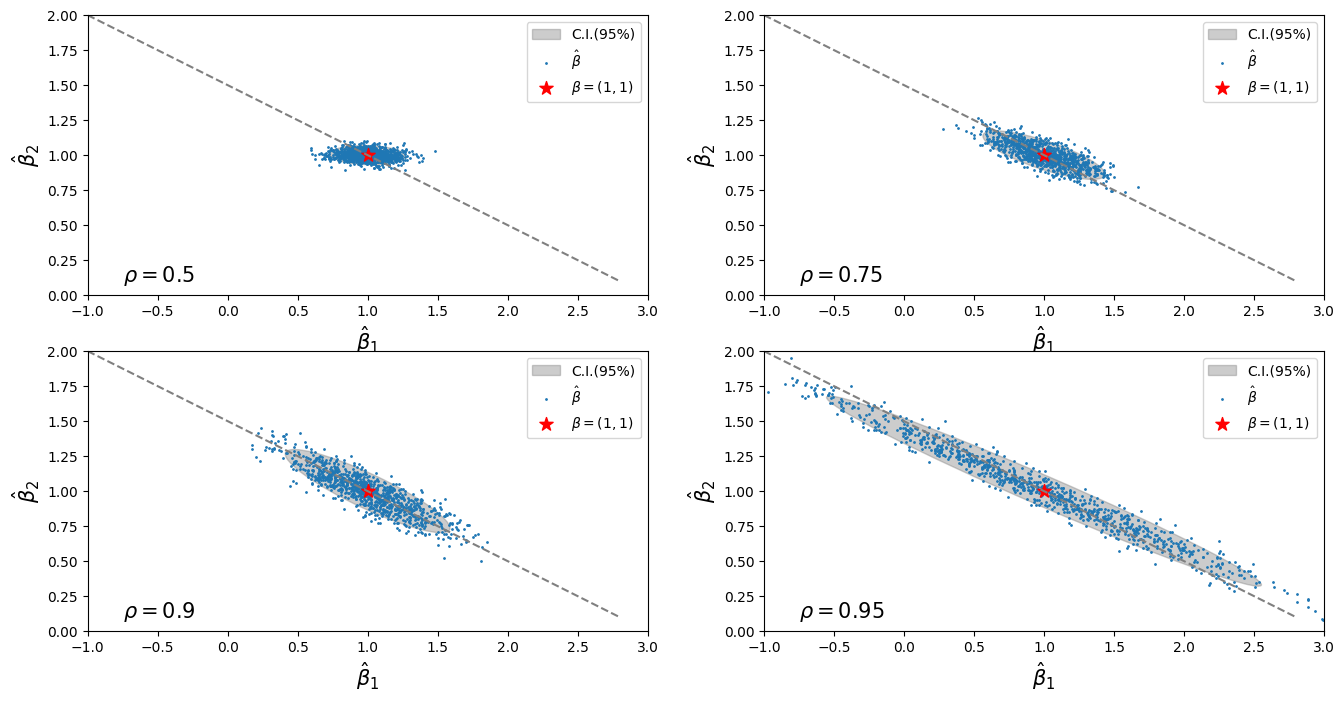

In [13]:
np.random.seed(3)

x1 = sigma1 * np.random.randn(sample_size) + 1

fig, axes = plt.subplots(2,2, figsize=(16, 8))
for rho, ax in zip((0.5, 0.75, 0.90, 0.95), axes.flatten()):
  # x2 の生成
  sigma_eta = np.abs(coef) * sigma1 * np.sqrt(1/rho**2 - 1)
  eta = sigma_eta * np.random.randn(sample_size)

  x2 = x1 * coef + eta

  # design matrix
  x_mat = np.r_[[np.ones(sample_size), x1, x2]].T
  x_mat

  # 誤差項を変えて複数回試行し、推定量の分布を求める。

  list_beta_hat = []

  x_pinv = np.linalg.pinv(x_mat) # Moore-Penrose inverse
  for i in range(0, n_iter):
    eps_vec = np.random.randn(sample_size) * sigma
    y = np.dot(x_mat, beta) + eps_vec
    beta_hat = np.dot(x_pinv, y)
    list_beta_hat.append(beta_hat)

  beta_hat_samples = np.array(list_beta_hat)


  # 作図
  x_min = -1.0
  x_max = 3.0

  beta_hat_samples = np.array(list_beta_hat)
  beta1_hat = beta_hat_samples[:, 1]
  beta2_hat = beta_hat_samples[:, 2]


  ax.set_box_aspect(0.5)

  ## 推定量分布の95%領域を表す楕円
  z_alpha = norm.ppf(0.975)
  cov = sigma ** 2 * (x_pinv @ x_pinv.T)[1:, 1:]  # 推定量の分散共分散行列
  cov_eig_val, cov_eig_vec = np.linalg.eig(cov)
  ellipse_width = np.sqrt(cov_eig_val[0]) * z_alpha * 2
  ellipse_height = np.sqrt(cov_eig_val[1]) * z_alpha * 2
  ellipse_angle = np.arctan2(cov_eig_vec[1,0], cov_eig_vec[0,0]) / np.pi * 180

  ellipse = Ellipse((1,1), width=ellipse_width, height=ellipse_height, angle=ellipse_angle, color="gray", alpha=0.4, label="C.I.(95%)")
  ax.add_patch(ellipse)

  plot_line(lambda x: -0.5*x + 1.5, x_min, x_max, ax, ls="--", color="gray")

  ax.scatter(x=beta1_hat, y=beta2_hat, s=1, label="$\\hat{\\beta}$")

  ax.scatter(beta[1], beta[2], color="red", s=100, marker="*", label="$\\beta=(1,1)$")

  ax.text(-0.75,0.1, "$\\rho={}$".format(rho), fontsize=15)

  ax.legend()

  ax.set_xlim(x_min, x_max)
  ax.set_ylim(0,(x_max - x_min) * 0.5)

  ax.set_xlabel("$\\hat{\\beta}_1$", fontsize="15")
  ax.set_ylabel("$\\hat{\\beta}_2$", fontsize="15")

# サンプルサイズを変えた時の変化

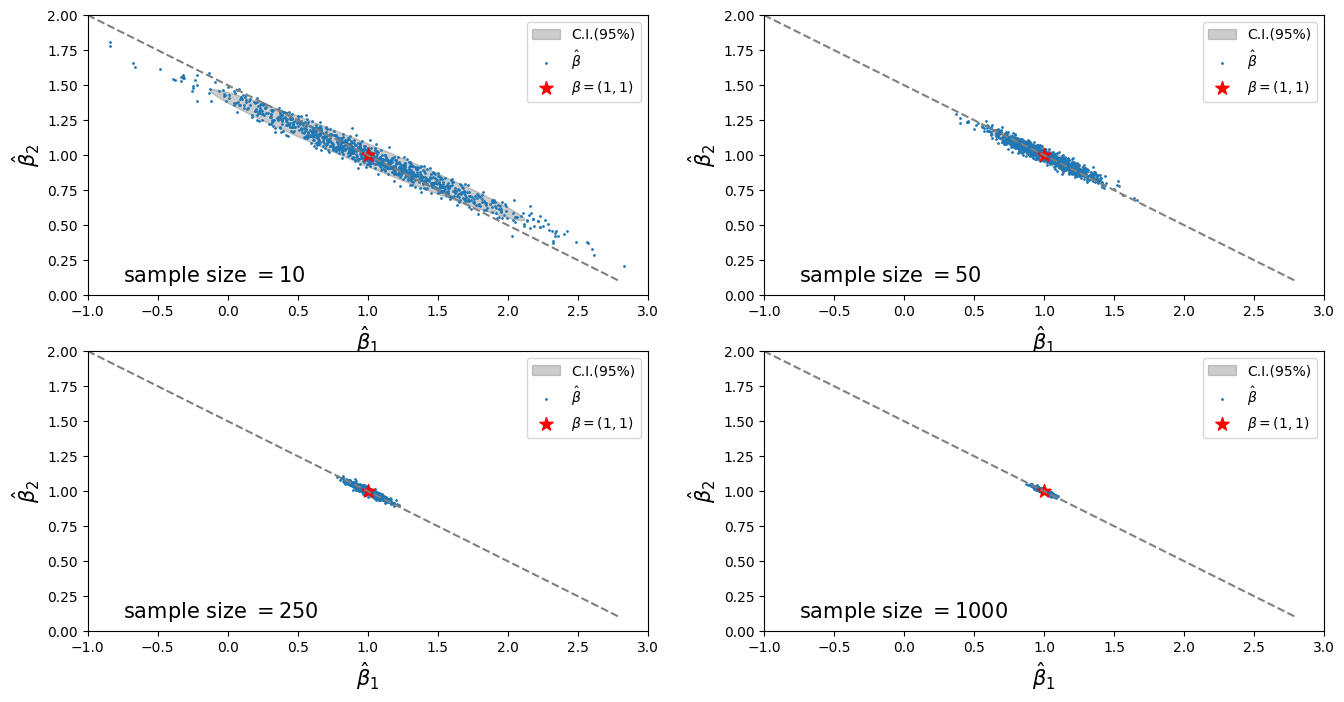

In [14]:
np.random.seed(1)

rho=0.95

fig, axes = plt.subplots(2,2, figsize=(16, 8))
for sample_size, ax in zip((10, 50, 250, 1000), axes.flatten()):

  # x1 の生成
  x1 = sigma1 * np.random.randn(sample_size) + 1

  # x2 の生成
  sigma_eta = np.abs(coef) * sigma1 * np.sqrt(1/rho**2 - 1)
  eta = sigma_eta * np.random.randn(sample_size)

  x2 = x1 * coef + eta

  # design matrix
  x_mat = np.r_[[np.ones(sample_size), x1, x2]].T
  x_mat

  # 誤差項を変えて複数回試行し、推定量の分布を求める。

  list_beta_hat = []

  x_pinv = np.linalg.pinv(x_mat) # Moore-Penrose inverse
  for i in range(0, n_iter):
    eps_vec = np.random.randn(sample_size) * sigma
    y = np.dot(x_mat, beta) + eps_vec
    beta_hat = np.dot(x_pinv, y)
    list_beta_hat.append(beta_hat)

  beta_hat_samples = np.array(list_beta_hat)


  # 作図
  x_min = -1.0
  x_max = 3.0

  beta_hat_samples = np.array(list_beta_hat)
  beta1_hat = beta_hat_samples[:, 1]
  beta2_hat = beta_hat_samples[:, 2]


  ax.set_box_aspect(0.5)

  ## 推定量分布の95%領域を表す楕円
  z_alpha = norm.ppf(0.975)
  cov = sigma ** 2 * (x_pinv @ x_pinv.T)[1:, 1:]  # 推定量の分散共分散行列
  cov_eig_val, cov_eig_vec = np.linalg.eig(cov)
  ellipse_width = np.sqrt(cov_eig_val[0]) * z_alpha * 2
  ellipse_height = np.sqrt(cov_eig_val[1]) * z_alpha * 2
  ellipse_angle = np.arctan2(cov_eig_vec[1,0], cov_eig_vec[0,0]) / np.pi * 180

  ellipse = Ellipse((1,1), width=ellipse_width, height=ellipse_height, angle=ellipse_angle, color="gray", alpha=0.4, label="C.I.(95%)")
  ax.add_patch(ellipse)

  plot_line(lambda x: -0.5*x + 1.5, x_min, x_max, ax, ls="--", color="gray")

  ax.scatter(x=beta1_hat, y=beta2_hat, s=1, label="$\\hat{\\beta}$")

  ax.scatter(beta[1], beta[2], color="red", s=100, marker="*", label="$\\beta=(1,1)$")

  #ax.text(-0.75,0.3, "$\\rho={}$".format(rho), fontsize=15)
  ax.text(-0.75,0.1, "sample size $={}$".format(sample_size), fontsize=15)

  ax.legend()

  ax.set_xlim(x_min, x_max)
  ax.set_ylim(0,(x_max - x_min) * 0.5)

  ax.set_xlabel("$\\hat{\\beta}_1$", fontsize="15")
  ax.set_ylabel("$\\hat{\\beta}_2$", fontsize="15")

# Ridge 回帰

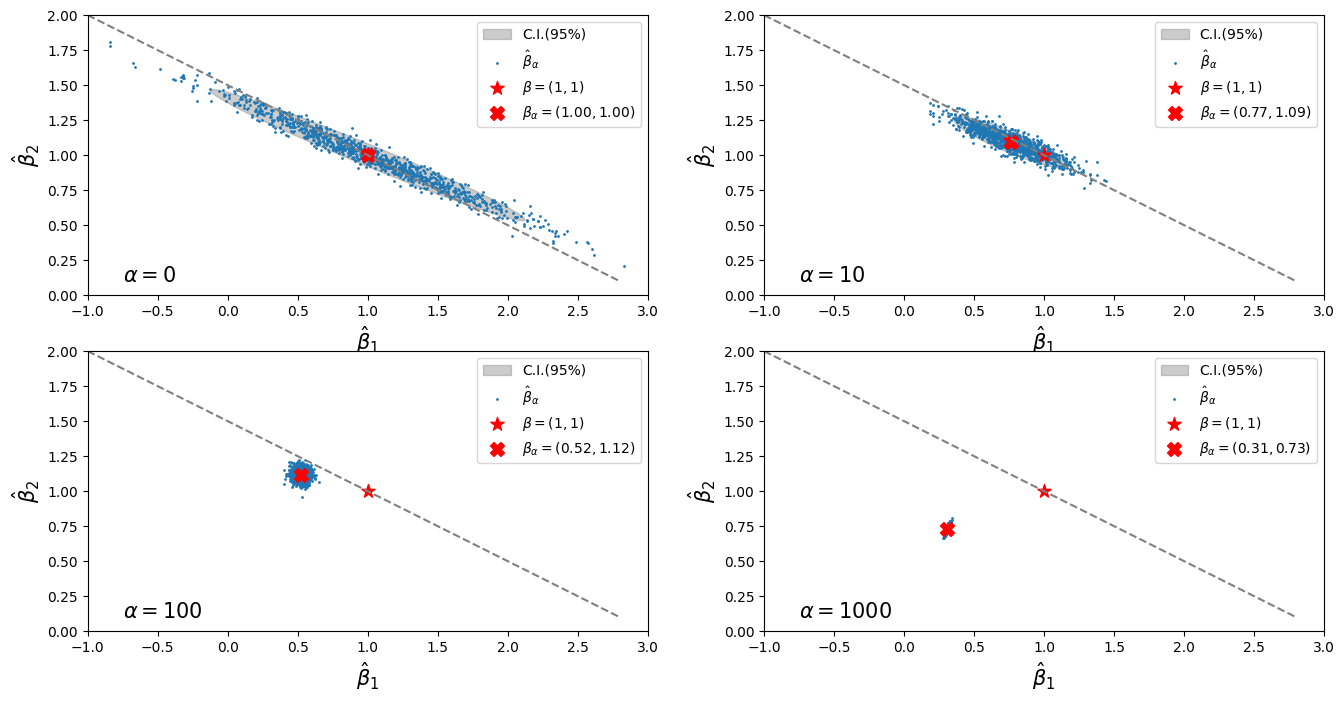

In [55]:
np.random.seed(1)

rho=0.95
sample_size=10

# x1 の生成
x1 = sigma1 * np.random.randn(sample_size) + 1

# x2 の生成
sigma_eta = np.abs(coef) * sigma1 * np.sqrt(1/rho**2 - 1)
eta = sigma_eta * np.random.randn(sample_size)
x2 = x1 * coef + eta

fig, axes = plt.subplots(2,2, figsize=(16, 8))
for alpha, ax in zip((0, 10, 100, 1000), axes.flatten()):



  # design matrix
  x_mat = np.r_[[np.ones(sample_size), x1, x2]].T

  # X^\top X
  xtx = x_mat.T @ x_mat
  ridge_mat = np.linalg.inv(xtx + alpha*np.identity(3))
  ridge_est_op = ridge_mat @ x_mat.T

  # Ridge 推定量の期待値
  ridge_beta = ridge_mat @ xtx @ beta


  # 誤差項を変えて複数回試行し、推定量の分布を求める。
  list_beta_hat = []

  for i in range(0, n_iter):
    eps_vec = np.random.randn(sample_size) * sigma
    y = np.dot(x_mat, beta) + eps_vec
    beta_hat = np.dot(ridge_est_op, y)
    list_beta_hat.append(beta_hat)

  beta_hat_samples = np.array(list_beta_hat)


  # 作図
  x_min = -1.0
  x_max = 3.0

  beta_hat_samples = np.array(list_beta_hat)
  beta1_hat = beta_hat_samples[:, 1]
  beta2_hat = beta_hat_samples[:, 2]


  ax.set_box_aspect(0.5)

  ## 推定量分布の95%領域を表す楕円
  z_alpha = norm.ppf(0.975)
  cov = sigma ** 2 * (ridge_mat @ xtx @ ridge_mat)[1:, 1:]  # 推定量の分散共分散行列
  cov_eig_val, cov_eig_vec = np.linalg.eig(cov)
  ellipse_width = np.sqrt(cov_eig_val[0]) * z_alpha * 2
  ellipse_height = np.sqrt(cov_eig_val[1]) * z_alpha * 2
  ellipse_angle = np.arctan2(cov_eig_vec[1,0], cov_eig_vec[0,0]) / np.pi * 180

  ellipse = Ellipse((ridge_beta[1], ridge_beta[2]), width=ellipse_width, height=ellipse_height, angle=ellipse_angle, color="gray", alpha=0.4, label="C.I.(95%)")
  ax.add_patch(ellipse)

  plot_line(lambda x: -0.5*x + 1.5, x_min, x_max, ax, ls="--", color="gray")

  ax.scatter(x=beta1_hat, y=beta2_hat, s=1, label="$\\hat{\\beta}_\\alpha$")

  ax.scatter(beta[1], beta[2], color="red", s=100, marker="*", label="$\\beta=(1,1)$")
  ax.scatter(ridge_beta[1], ridge_beta[2], color="red", s=100, marker="X", label="$\\beta_\\alpha=({:.2f},{:.2f})$".format(ridge_beta[1], ridge_beta[2]))

  #ax.text(-0.75,0.3, "$\\rho={}$".format(rho), fontsize=15)
  ax.text(-0.75,0.1, "$\\alpha = {}$".format(alpha), fontsize=15)

  ax.legend()

  ax.set_xlim(x_min, x_max)
  ax.set_ylim(0,(x_max - x_min) * 0.5)

  ax.set_xlabel("$\\hat{\\beta}_1$", fontsize="15")
  ax.set_ylabel("$\\hat{\\beta}_2$", fontsize="15")